# Case Study on ANOVA

XYZ Company has offices in four different zones. The company wishes to investigate the following :

    ● The mean sales generated by each zone.

    ● Total sales generated by all the zones for each month.

    ● Check whether all the zones generate the same amount of sales.

Help the company to carry out their study with the help of data provided.

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Import Dataset

In [152]:
data = pd.read_csv("Sales_data_zone_wise.csv")

In [153]:
data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [154]:
data.shape

(29, 5)

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


## The mean sales generated by each zone.

In [156]:
data["Zone - A"]= data["Zone - A"].astype("float64")
data.mean()

Zone - A    1.540493e+06
Zone - B    1.755560e+06
Zone - C    1.772871e+06
Zone - D    1.842927e+06
dtype: float64

In [157]:
data.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Zone - A,Zone - B,Zone - C,Zone - D
count,29.00000,29.00000,29.00000,29.00000
mean,1540493.13793,1755559.58621,1772871.03448,1842926.75862
std,261940.06187,168389.88590,333193.72453,375016.47949
min,1128185.00000,1527574.00000,1237722.00000,1234311.00000
25%,1305972.00000,1606010.00000,1523308.00000,1520406.00000
50%,1534390.00000,1740365.00000,1767047.00000,1854412.00000
75%,1820196.00000,1875658.00000,2098463.00000,2180416.00000
max,2004480.00000,2091194.00000,2290580.00000,2364132.00000


#### The Mean sales generated by each zone are as listed below:
    
    Zone - A : 1540493.13793
    Zone - B : 1755559.58621
    Zone - C : 1772871.03448
    Zone - D : 1842926.75862

array([[<AxesSubplot:title={'center':'Zone - A'}>,
        <AxesSubplot:title={'center':'Zone - B'}>],
       [<AxesSubplot:title={'center':'Zone - C'}>,
        <AxesSubplot:title={'center':'Zone - D'}>]], dtype=object)

<Figure size 1440x864 with 0 Axes>

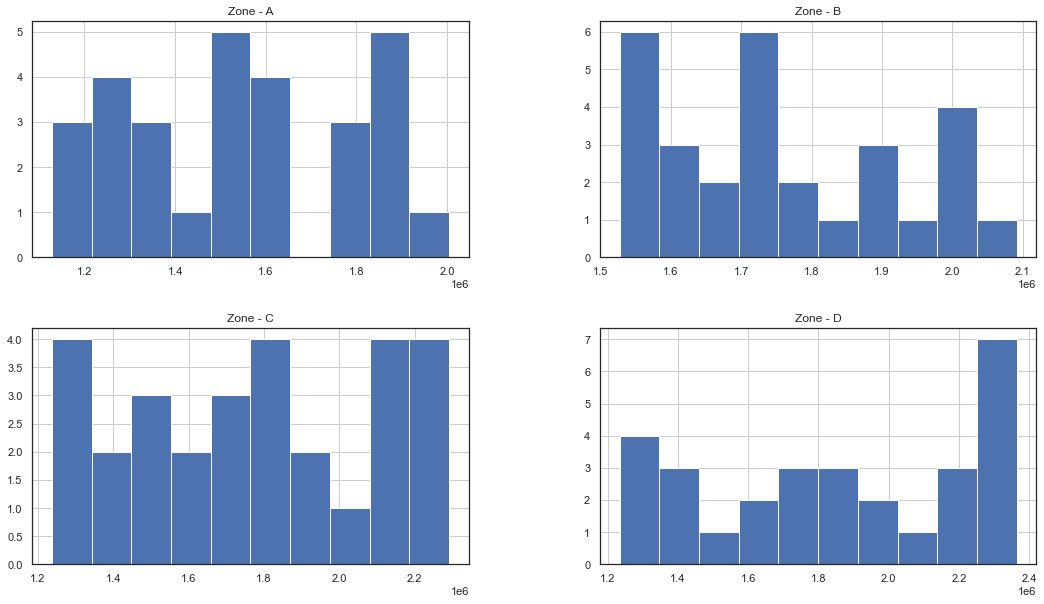

In [158]:
plt.figure(figsize=(20, 12))
data.hist(figsize=(18, 10))

<AxesSubplot:>

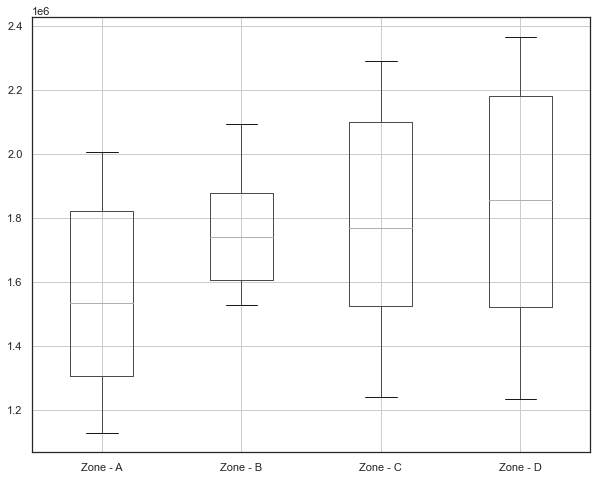

In [159]:
plt.figure(figsize=(10, 8))
data.boxplot()

From the above boxplot we can see that the Zone-A is tanding out from other zones.

## Total sales generated by all the zones for each month.

In [160]:
data["Total Sales"]=data["Zone - A"]+data["Zone - B"]+data["Zone - C"]+data["Zone - D"]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        29 non-null     object 
 1   Zone - A     29 non-null     float64
 2   Zone - B     29 non-null     int64  
 3   Zone - C     29 non-null     int64  
 4   Zone - D     29 non-null     int64  
 5   Total Sales  29 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.5+ KB


In [161]:
data[["Month","Total Sales"]]

,Month,Total Sales
0,Month - 1,7022544.0
1,Month - 2,7152303.0
2,Month - 3,6475939.0
3,Month - 4,8174449.0
4,Month - 5,5995328.0
5,Month - 6,7151387.0
6,Month - 7,7287108.0
7,Month - 8,7816299.0
8,Month - 9,6703395.0
9,Month - 10,7128210.0


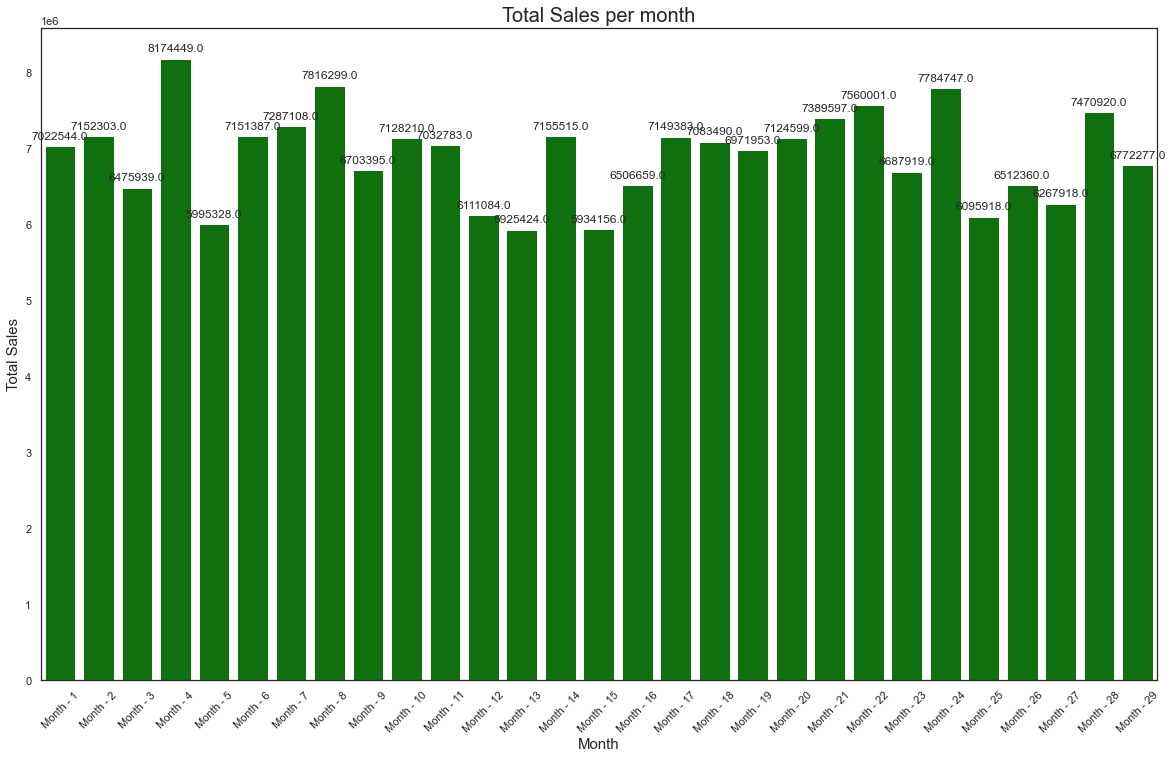

In [162]:
plt.figure(figsize=(20, 12))
ax = sns.barplot(x="Month", y="Total Sales", data=data,color="green")
plt.xlabel("Month", size=15)
plt.ylabel("Total Sales", size=15)
plt.title("Total Sales per month", size=20);
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

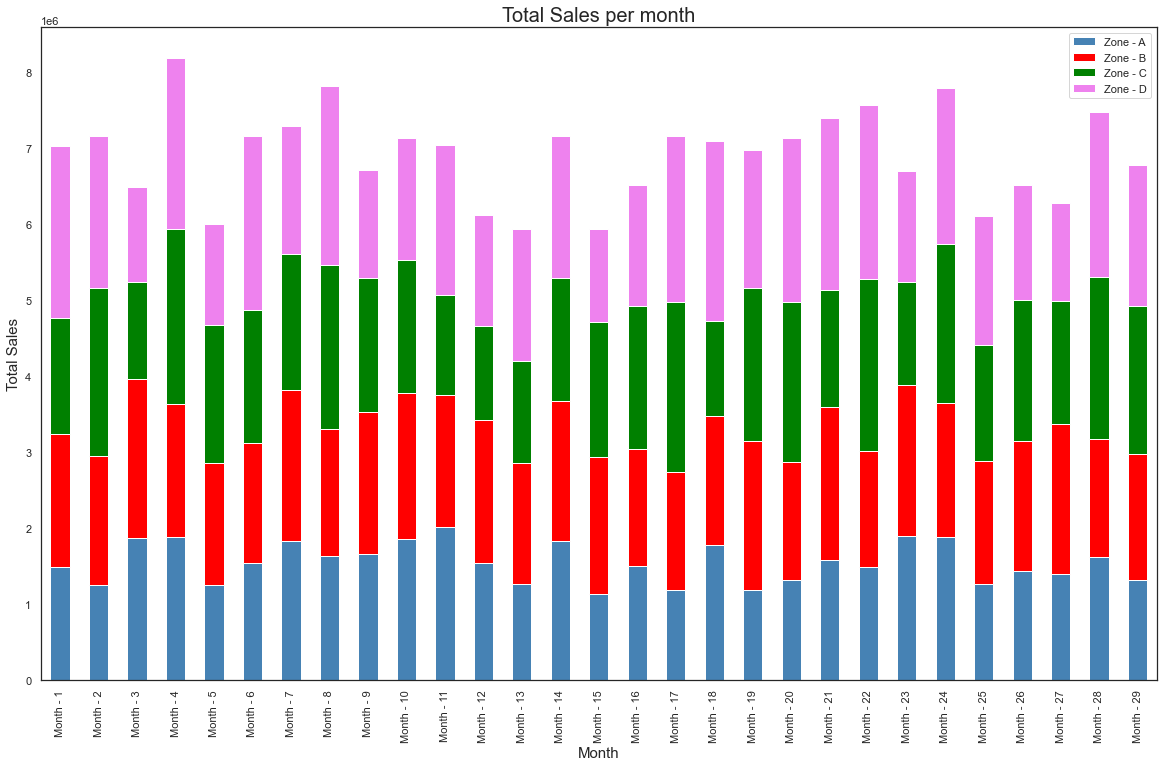

In [163]:
data1=data.drop("Total Sales",axis=1)

#set seaborn plotting aesthetics
sns.set(style='white')

#create stacked bar chart
ax=data1.set_index('Month').plot(kind='bar', stacked=True, color=['steelblue', 'red','green','violet'],figsize=(20, 12))
#for p in ax.patches:
#    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xlabel("Month", size=15)
plt.ylabel("Total Sales", size=15)
plt.title("Total Sales per month", size=20);

## Check whether all the zones generate the same amount of sales.

#### Null hypothesis: All zones average sales are equal (no variation in means of groups) 
H0: μ1=μ2=…=μp

#### Alternative hypothesis: At least, one zone's average sales is different from other groups 
H1: All μ are not equal

In [164]:
F, p = stats.f_oneway(data['Zone - A'],data['Zone - B'],data['Zone - C'],data['Zone - D'])
# Seeing if the overall model is significant
prob = 0.95
dfn = 4-1
dfd = 4*(29-1)
critical = stats.f.ppf(prob, dfn, dfd)

print('\n')
print('F-Statistic=%.3f, p=%.3f' % (F, p))
if (p<0.05):
    print("We can see that p-value <0.05. Hence, we can reject the Null Hypothesis and we can say that all the zone are not generating same amount of sales")
print('\n')    
print('F-Critical=%.3f' % (critical))
print('F-Statistic=%.3f' % (F))
if (critical<F):
    print("We can see that F-Statistic > F-Critical. Hence, we can reject the Null Hypothesis and we can say that all the zone are not generating same amount of sales")



F-Statistic=5.672, p=0.001
We can see that p-value <0.05. Hence, we can reject the Null Hypothesis and we can say that all the zone are not generating same amount of sales


F-Critical=2.686
F-Statistic=5.672
We can see that F-Statistic > F-Critical. Hence, we can reject the Null Hypothesis and we can say that all the zone are not generating same amount of sales


In [165]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [166]:
zAdata = pd.DataFrame(data, columns=['Zone', 'Sales'])
zAdata["Sales"] = data['Zone - A']
zAdata["Zone"]  = 'Zone - A'
zBdata = pd.DataFrame(data, columns=['Zone', 'Sales'])
zBdata["Sales"] = data['Zone - B']
zBdata["Zone"]  = 'Zone - B'
zCdata = pd.DataFrame(data, columns=['Zone', 'Sales'])
zCdata["Sales"] = data['Zone - C']
zCdata["Zone"]  = 'Zone - C'
zDdata = pd.DataFrame(data, columns=['Zone', 'Sales'])
zDdata["Sales"] = data['Zone - D']
zDdata["Zone"]  = 'Zone - D'
newData=pd.concat([zAdata,zBdata,zCdata,zDdata], axis=0)
newData

,Zone,Sales
0,Zone - A,1483525.0
1,Zone - A,1238428.0
2,Zone - A,1860771.0
3,Zone - A,1871571.0
4,Zone - A,1244922.0
...,...,...
24,Zone - D,1695122.0
25,Zone - D,1520406.0
26,Zone - D,1289160.0
27,Zone - D,2178267.0


In [167]:
model = ols("Sales ~ Zone", data=newData).fit()

In [168]:
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Zone,3.0,1.483058e+12,4.943525e+11,5.672056,0.001183
Residual,112.0,9.761449e+12,8.715579e+10,NaN,NaN


In [169]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
Zone,1.483058e+12,3.0,4.943525e+11,5.672056,0.001183,0.131892,0.107803
Residual,9.761449e+12,112.0,8.715579e+10,NaN,NaN,NaN,NaN


We can see that p-value <0.05. Hence, we can reject the Null Hypothesis and we can say that all the zone are not generating same amount of sales

In [170]:
pip install bioinfokit

Note: you may need to restart the kernel to use updated packages.


### Post Hoc test to compare between zones

In [171]:
#From ANOVA analysis, we know that treatment differences are statistically significant, but ANOVA does not tell which treatments are significantly different from each other. To know the pairs of significant different treatments, we will perform multiple pairwise comparison (post hoc comparison) analysis for all unplanned comparison using Tukey’s honestly significantly differenced (HSD) test.
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=newData, res_var='Sales', xfac_var='Zone', anova_model='Sales ~ C(Zone)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Zone - A,Zone - B,215066.448276,12856.297302,417276.599250,3.923047,0.032441
1,Zone - A,Zone - C,232377.896552,30167.745578,434588.047526,4.238827,0.017418
2,Zone - A,Zone - D,302433.620690,100223.469716,504643.771664,5.516720,0.001000
3,Zone - B,Zone - C,17311.448276,-184898.702698,219521.599250,0.315780,0.900000
4,Zone - B,Zone - D,87367.172414,-114842.978560,289577.323388,1.593673,0.654049
5,Zone - C,Zone - D,70055.724138,-132154.426836,272265.875112,1.277893,0.778653


#### Above results from Tukey’s HSD suggests that except Zone B-Zone C,Zone B-Zone D,Zone C-Zone D all other pair-wise comparisons for treatments rejects null hypothesis (p < 0.05) and indicates statistical significant differences.It looks like Zone-A's average sales is significantly different from other zones

### Test ANOVA assumptions

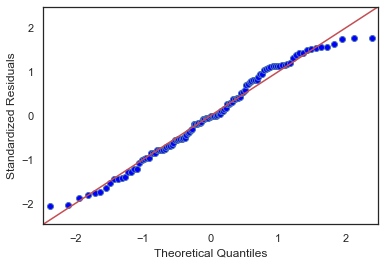

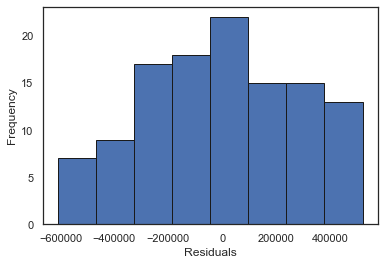

In [172]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

As the standardized residuals lie around the 45-degree line, it suggests that the residuals are approximately normally distributed

In the histogram, the distribution looks approximately normal and suggests that residuals are approximately normally distributed